In [ ]:
# Core
import pandas as pd
import numpy as np
import os
import cv2
import gc
import itertools
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm
from datetime import datetime
import json,itertools
from typing import Optional
from glob import glob
import warnings
from IPython import display as ipd
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.patches import Rectangle
import seaborn as sns
import random
from joblib import Parallel, delayed
import os, shutil
import datetime 

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance

# Keras
import tensorflow as tf

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Keras
from tensorflow import keras
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Model
from tensorflow.keras.layers import LSTM, Flatten, TimeDistributed, Conv1D, Input, Dense, Multiply, Add, Activation, GRU, BatchNormalization
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.losses import binary_crossentropy
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model, save_model, Sequential
from tensorflow.data import Dataset
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Flatten,MaxPooling1D,BatchNormalization, Lambda, AveragePooling1D, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
import tensorflow.keras as keras

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 14.9 MB/s 
     |████████████████████████████████| 209 kB 79.6 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 147 kB 75.0 MB/s 
     |████████████████████████████████| 112 kB 46.9 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=63d36537015c10407beaec9c80131f929e22227a2252e60c0b4ba4b3d9f3d270
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/data

/content/gdrive/MyDrive/data


In [ ]:
seeds=101

def seeding(SEED):
    """
    Sets all random seeds for the program (Python, NumPy, and TensorFlow).
    """
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    os.environ["TF_CUDNN_DETERMINISTIC"] = str(SEED)
    tf.random.set_seed(SEED)
    print("seeding done")


seeding(seeds)

seeding done


In [ ]:
DATASET_DIR = "paldang/"

In [ ]:
train_df = pd.read_csv(DATASET_DIR + 'train_data.csv')
test_df = pd.read_csv(DATASET_DIR + 'test_data.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263520 entries, 0 to 263519
Data columns (total 77 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             263520 non-null  int64  
 1   ymdhm                  263520 non-null  object 
 2   swl                    263520 non-null  float64
 3   inf                    263520 non-null  float64
 4   sfw                    263520 non-null  float64
 5   ecpc                   263520 non-null  float64
 6   tototf                 263520 non-null  float64
 7   tide_level             263520 non-null  float64
 8   wl_1018662             263520 non-null  float64
 9   fw_1018662             263520 non-null  float64
 10  wl_1018680             263520 non-null  float64
 11  fw_1018680             263520 non-null  float64
 12  wl_1018683             263520 non-null  float64
 13  fw_1018683             263520 non-null  float64
 14  wl_1019630             263520 non-nu

In [ ]:
#feature = ['year','month','day', 'weekday', 'hour_te', 'hour_te1', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630', 'inf_day_mean', 'tototf_day_mean', 'tototf_shifted24', 'tototf_shifted30', 'tototf_shifted36', 'rf_10184100_month_sum', 'rf_10184110_month_sum', 'rf_10184140_month_sum', 'fw_1018662_hour_mean', 'fw_1018680_hour_mean', 'fw_1018683_hour_mean', 'fw_1019630_hour_mean', 'inf_hour_mean', 'inf_shifted36', 'inf_shifted48', 'inf_shifted60', 'fw_1018662_diff', 'fw_1018683_diff', 'fw_1019630_diff', 'swl_diff', 'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
#features = ['year','month','day', 'weekday', 'hour_te', 'hour_te1', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630', 'inf_day_mean', 'tototf_day_mean', 'tototf_shifted24', 'tototf_shifted30', 'tototf_shifted36', 'rf_10184100_month_sum', 'rf_10184110_month_sum', 'rf_10184140_month_sum', 'fw_1018662_hour_mean', 'fw_1018680_hour_mean', 'fw_1018683_hour_mean', 'fw_1019630_hour_mean', 'inf_hour_mean', 'inf_shifted36', 'inf_shifted48', 'inf_shifted60', 'fw_1018662_diff', 'fw_1018683_diff', 'fw_1019630_diff', 'swl_diff']
feature = ['year','month','day', 'weekday', 'hour_te', 'hour_te1', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683',  'fw_1019630', 'inf_day_mean', 'tototf_day_mean', 'tototf_shifted24', 'tototf_shifted30', 'tototf_shifted36', 'rf_10184100_month_sum', 'rf_10184110_month_sum', 'rf_10184140_month_sum', 'fw_1018662_hour_mean', 'fw_1018683_hour_mean', 'fw_1019630_hour_mean', 'inf_hour_mean', 'inf_shifted36', 'inf_shifted48', 'inf_shifted60', 'fw_1018662_diff', 'fw_1018683_diff', 'fw_1019630_diff', 'swl_diff', 'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
features = ['year','month','day', 'weekday', 'hour_te', 'hour_te1', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630', 'inf_day_mean', 'tototf_day_mean', 'tototf_shifted24', 'tototf_shifted30', 'tototf_shifted36', 'rf_10184100_month_sum', 'rf_10184110_month_sum', 'rf_10184140_month_sum', 'fw_1018662_hour_mean', 'fw_1018683_hour_mean', 'fw_1019630_hour_mean', 'inf_hour_mean', 'inf_shifted36', 'inf_shifted48', 'inf_shifted60', 'fw_1018662_diff', 'fw_1018683_diff', 'fw_1019630_diff', 'swl_diff']
target =  ["wl_1018662", "wl_1018680", "wl_1018683", "wl_1019630"]
test_df = test_df[feature]
train_df = train_df[feature]

In [ ]:
train_df.head()

,year,month,day,weekday,hour_te,hour_te1,swl,inf,sfw,ecpc,...,inf_shifted48,inf_shifted60,fw_1018662_diff,fw_1018683_diff,fw_1019630_diff,swl_diff,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2012,5,2,2,0.0,1.0,24.790,408.0,218.73,25.27,...,504.0,407.0,6.76,-13.39,0.0,-0.001,303.7,295.2,285.0,271.3
1,2012,5,2,2,0.0,1.0,24.803,267.6,219.19,24.81,...,511.5,518.3,0.00,16.74,0.0,-0.013,303.7,295.2,285.0,271.3
2,2012,5,2,2,0.0,1.0,24.805,266.4,219.23,24.77,...,511.5,616.4,6.71,8.37,0.0,-0.002,302.7,294.2,285.0,271.3
3,2012,5,2,2,0.0,1.0,24.800,265.9,219.07,24.93,...,511.5,518.3,0.00,55.84,0.0,0.005,302.7,294.2,284.0,271.3
4,2012,5,2,2,0.0,1.0,24.808,363.6,219.36,24.64,...,511.5,616.3,0.00,-16.72,0.0,-0.008,302.7,293.2,284.0,271.3


In [ ]:
train_df_data = train_df[features]
train_df_target = train_df[target]
test_df_data = test_df[features]
test_df_target = test_df[target]

In [ ]:
train_df_data = train_df_data.reset_index(drop=True)
train_df_target = train_df_target.reset_index(drop=True)
train_df_data.index += 1
train_df_total = pd.concat((train_df_data, train_df_target),axis=1)

In [ ]:
test_df_data = test_df_data.reset_index(drop=True)
test_df_target = test_df_target.reset_index(drop=True)
test_df_data.index += 1
test_df_total = pd.concat((test_df_data, test_df_target),axis=1)

In [ ]:
train_df_data = train_df_total[features]
train_df_target = train_df_total[target]
train_df_data = train_df_data[1:].reset_index()
train_df_target = train_df_target[:-1].reset_index()

In [ ]:
train_df_data = pd.concat((train_df_data, test_df_data[:-6912]), axis=0).reset_index()
train_df_target = pd.concat((train_df_target, test_df_target[:-6912]), axis=0).reset_index()

In [ ]:
test_df_data = test_df_total[features]
test_df_target = test_df_total[target]
test_df_data = test_df_data[1:].reset_index()
test_df_target = test_df_target[:-1].reset_index()
test_df_data = test_df_data[-6912:].reset_index(drop=True)
test_df_target = test_df_target[-6912:].reset_index(drop=True)

In [ ]:
test_df_data = test_df_data[features]
train_df_target = train_df_target[target]
train_df_data = train_df_data[features]
test_df_target = test_df_target[target]

In [ ]:
print('--train--')
print(train_df_data.shape)
print(train_df_target.shape)
print('--test--')
print(test_df_data.shape)
print(test_df_target.shape)

--train--
(267840, 34)
(267840, 4)
--test--
(6912, 34)
(6912, 4)


In [ ]:
train_df_data = train_df_data.fillna(0)
test_df_data = test_df_data.fillna(0)

In [ ]:
def rmse(actual, predicted):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))

def mse(actual, predicted):
    """ Mean Squared Error """
    return np.mean(np.square(np.subtract(actual, predicted)))

In [ ]:
def weighted_mse(alpha = 1):
    def weighted_mse_fixed(label, pred):
        residual = (label - pred).astype("float")
        grad = np.where(residual>0, -2*alpha*residual, -2*residual)
        hess = np.where(residual>0, 2*alpha, 2.0)
        return grad, hess
    return weighted_mse_fixed

In [ ]:
target =  ["wl_1018662", "wl_1018680", "wl_1018683", "wl_1019630"]

In [ ]:
submission = pd.read_csv('paldang/sample_submission.csv')

## XGBoost

In [ ]:
train_df_target_ = train_df_target['wl_1018662']


def objective(trial,data=train_df_data,target=train_df_target_):
    
    train_x, test_x, train_y, test_y = train_test_split(train_df_data, train_df_target_, test_size=0.2,random_state=42)
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'colsample_bynode':trial.suggest_discrete_uniform('colsample_bynode', 0.1, 1, 0.01),
        'colsample_bylevel':trial.suggest_discrete_uniform('colsample_bylevel', 0.1, 1, 0.01),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.012,0.016,0.018, 0.02, 0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 20000, 50000),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [42]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 400),
        'objective': 'reg:squarederror'
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Best_trial = study.best_trial.params
Best_trial["tree_method"] = 'gpu_hist'
Best_trial

[I 2022-08-29 10:01:30,876] A new study created in memory with name: no-name-e255ba76-d733-4609-a674-0c6c053029ec


KeyboardInterrupt: ignored

In [ ]:
train_df_target_ = train_df_target['wl_1018662']


Best_trial = {'alpha': 0.018413750787302015,
 'colsample_bytree': 1.0,
 'lambda': 0.0398197187304524,
 'learning_rate': 0.01,
 'max_depth': 13,
 'min_child_weight': 20,
 'n_estimators': 20000,
 'random_state': 42,
 'subsample': 0.6,
 'tree_method': 'gpu_hist',
  'objective': 'reg:squarederror',
  'eval_metric': 'rmse'}


preds = np.zeros(test_df_data.shape[0])

kf = KFold(n_splits=5,random_state=42,shuffle=True)
rmse=[]  # list contains rmse for each fold
n=0

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  xgb_reg = XGBRegressor(**Best_trial)

  xgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=1000, verbose=False)
  y_pred = xgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = xgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018662"] = preds

fold: 1 ==> rmse: 0.917395853902935
fold: 2 ==> rmse: 0.7458788927165202
fold: 3 ==> rmse: 0.7971609906121663
fold: 4 ==> rmse: 1.1308250563225946
fold: 5 ==> rmse: 0.8097095410021528


In [ ]:
train_df_target_ = train_df_target['wl_1018680']

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Best_trial = study.best_trial.params
Best_trial["tree_method"] = 'gpu_hist'
Best_trial

In [ ]:
train_df_target_ = train_df_target['wl_1018680']

preds = np.zeros(test_df_data.shape[0])

kf = KFold(n_splits=5,random_state=42,shuffle=True)
rmse=[]  # list contains rmse for each fold
n=0


Best_trial = {'alpha': 0.0022827886072498645,
 'colsample_bytree': 0.7,
 'lambda': 0.006168253589926699,
 'learning_rate': 0.018,
 'max_depth': 15,
 'min_child_weight': 41,
 'n_estimators': 20000,
 'random_state': 42,
 'subsample': 0.6,
 'tree_method': 'gpu_hist',
  'objective': 'reg:squarederror',
  'eval_metric': 'rmse'}

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  xgb_reg = XGBRegressor(**Best_trial)

  xgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=1000, verbose=False)
  y_pred = xgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = xgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018680"] = pred

fold: 1 ==> rmse: 1.8824215556411217
fold: 2 ==> rmse: 1.7096577018577204
fold: 3 ==> rmse: 1.7445260136587128
fold: 4 ==> rmse: 1.9624560059344929
fold: 5 ==> rmse: 1.7527543654239373


In [ ]:
train_df_target_ = train_df_target['wl_1018683']

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Best_trial = study.best_trial.params
Best_trial["tree_method"] = 'gpu_hist'
Best_trial

In [ ]:
train_df_target_ = train_df_target['wl_1018683']


preds = np.zeros(test_df_data.shape[0])

kf = KFold(n_splits=5,random_state=42,shuffle=True)
rmse=[]  # list contains rmse for each fold
n=0

Best_trial = {'alpha': 0.0021317117857960013,
 'colsample_bytree': 0.6,
 'lambda': 0.40697894634344806,
 'learning_rate': 0.018,
 'max_depth': 15,
 'min_child_weight': 37,
 'n_estimators': 20000,
 'random_state': 42,
 'subsample': 0.6,
 'tree_method': 'gpu_hist',
  'objective': 'reg:squarederror',
  'eval_metric': 'rmse',}

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  xgb_reg = XGBRegressor(**Best_trial)

  xgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=1000, verbose=False)
  y_pred = xgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = xgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018683"] = pred

fold: 1 ==> rmse: 1.718096463066629
fold: 2 ==> rmse: 1.5657000209476577
fold: 3 ==> rmse: 1.6260388152842156
fold: 4 ==> rmse: 1.7805712521861203
fold: 5 ==> rmse: 1.662302159624884


In [ ]:
train_df_target_ = train_df_target['wl_1019630']

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Best_trial = study.best_trial.params
Best_trial["tree_method"] = 'gpu_hist'
Best_trial

In [ ]:
train_df_target_ = train_df_target['wl_1019630']

preds = np.zeros(test_df_data.shape[0])

kf = KFold(n_splits=5,random_state=42,shuffle=True)
rmse=[]  # list contains rmse for each fold
n=0

Best_trial = {'alpha': 0.007997507769922951,
 'colsample_bytree': 1.0,
 'lambda': 0.0026890622253430583,
 'learning_rate': 0.014,
 'max_depth': 17,
 'min_child_weight': 12,
 'n_estimators': 20000,
 'random_state': 42,
 'subsample': 0.6,
 'tree_method': 'gpu_hist',
  'objective': 'reg:squarederror',
  'eval_metric': 'rmse'}

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  xgb_reg = XGBRegressor(**Best_trial)

  xgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=1000, verbose=False)
  y_pred = xgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = xgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1019630"] = pred

fold: 1 ==> rmse: 0.4256904779540274
fold: 2 ==> rmse: 0.3939467771816329
fold: 3 ==> rmse: 0.380654578680949
fold: 4 ==> rmse: 0.45187661632919146
fold: 5 ==> rmse: 0.37758341360322006


<Figure size 1440x1440 with 0 Axes>

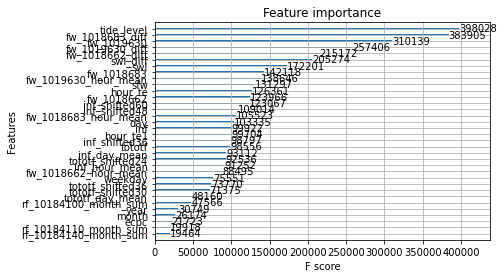

In [ ]:
plt.figure(figsize=(20,20))
plot_importance(xgb_reg)
plt.show()

In [ ]:
submission.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,278.185265,275.156189,275.300903,269.300110
1,2022-06-01 00:10,280.708061,274.158112,275.023346,267.299988
2,2022-06-01 00:20,283.595112,275.237183,276.068665,264.299744
3,2022-06-01 00:30,284.620430,275.886017,275.322937,261.303802
4,2022-06-01 00:40,283.623436,275.985291,275.151154,259.300720


In [ ]:
submission.to_csv(DATASET_DIR + "submission_result.csv", index = False)

## LightGBM

In [ ]:
train_df_target_ = train_df_target['wl_1018662']

def lgbm_objective(trial,data=train_df_data,target=train_df_target_):
    
    train_x, test_x, train_y, test_y = train_test_split(train_df_data, train_df_target_, test_size=0.2,random_state=42)

        
    param = {'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': trial.suggest_int('n_estimators', 10000, 30000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02, 0.1, 0.04]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),

    }
    model = lgb.LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(lgbm_objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Best_trial=study.best_params   

[I 2022-08-24 12:53:36,269] A new study created in memory with name: no-name-5f4c466e-31d2-480a-a23c-00d92a895473
[I 2022-08-24 12:56:06,423] Trial 0 finished with value: 0.9313124864540154 and parameters: {'n_estimators': 10655, 'reg_alpha': 0.010769646267341925, 'reg_lambda': 0.024309577015058762, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 711, 'min_child_samples': 128, 'min_data_per_groups': 81}. Best is trial 0 with value: 0.9313124864540154.
[I 2022-08-24 13:10:32,341] Trial 1 finished with value: 1.1597884640132536 and parameters: {'n_estimators': 15943, 'reg_alpha': 0.22017895282111952, 'reg_lambda': 0.2226826791990071, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.04, 'max_depth': 100, 'num_leaves': 255, 'min_child_samples': 258, 'min_data_per_groups': 54}. Best is trial 0 with value: 0.9313124864540154.
[I 2022-08-24 13:18:51,910] Trial 2 finished with value: 0.7005781392731621 and parameters: {'n_estimator

Number of finished trials: 30
Best trial: {'n_estimators': 12604, 'reg_alpha': 0.8398112504473182, 'reg_lambda': 2.765346082061197, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 725, 'min_child_samples': 3, 'min_data_per_groups': 42}


In [ ]:
Best_trial= {'reg_alpha': 0.3591025402196991, 
             'reg_lambda': 0.0011256946676544382, 
             'colsample_bytree': 0.8, 
             'subsample': 0.5, 
             'learning_rate': 0.006, 
             'max_depth': 20, 
             'num_leaves': 457, 
             'min_child_samples': 3, 
             'min_data_per_groups': 61}
Best_trial['random_state'] = 42
Best_trial['n_estimators'] = 20000 
Best_trial['metric'] = 'rmse'

train_df_target_ = train_df_target['wl_1018662']

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  lgb_reg = LGBMRegressor(**Best_trial)

  lgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=500, verbose=False)
  y_pred = lgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = lgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018662"] = preds

fold: 1 ==> rmse: 0.35903852512883355
fold: 2 ==> rmse: 0.31168875400420876
fold: 3 ==> rmse: 0.4145570162398571
fold: 4 ==> rmse: 0.4535998976687147
fold: 5 ==> rmse: 0.34907551208118826


In [ ]:
train_df_target_ = train_df_target['wl_1018680']

study = optuna.create_study(direction='minimize')
study.optimize(lgbm_objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2022-08-24 16:48:25,936] A new study created in memory with name: no-name-b6302c25-e25d-4cf1-81fc-79f0ac938d87
[I 2022-08-24 17:02:58,572] Trial 0 finished with value: 1.1965564868111547 and parameters: {'n_estimators': 16819, 'reg_alpha': 6.0965958443740815, 'reg_lambda': 0.05678753376588002, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 500, 'min_child_samples': 24, 'min_data_per_groups': 11}. Best is trial 0 with value: 1.1965564868111547.
[I 2022-08-24 17:06:56,751] Trial 1 finished with value: 1.5024134847111192 and parameters: {'n_estimators': 13403, 'reg_alpha': 0.0012230020337501825, 'reg_lambda': 0.09777523011080132, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 10, 'num_leaves': 715, 'min_child_samples': 152, 'min_data_per_groups': 7}. Best is trial 0 with value: 1.1965564868111547.
[I 2022-08-24 17:12:23,524] Trial 2 finished with value: 1.3814958490578253 and parameters: {'n_estimators'

Number of finished trials: 30
Best trial: {'n_estimators': 16983, 'reg_alpha': 0.17841397534157916, 'reg_lambda': 0.27238400675450836, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 319, 'min_child_samples': 31, 'min_data_per_groups': 18}


In [ ]:
Best_trial= {'reg_alpha': 0.8647279319336788, 'reg_lambda': 0.003599928189509784, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 613, 'min_child_samples': 60, 'min_data_per_groups': 57}
Best_trial['random_state'] = 42
Best_trial['n_estimators'] = 20000 
Best_trial['metric'] = 'rmse'
#Best_trial = {'n_estimators': 16983, 'reg_alpha': 0.17841397534157916, 'reg_lambda': 0.27238400675450836, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 319, 'min_child_samples': 31, 'min_data_per_groups': 18}


train_df_target_ = train_df_target['wl_1018680']

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  lgb_reg = LGBMRegressor(**Best_trial)

  lgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=500, verbose=False)
  y_pred = lgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = lgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018680"] = preds

fold: 1 ==> rmse: 1.7128472046572556
fold: 2 ==> rmse: 1.6574624170324197
fold: 3 ==> rmse: 1.592455854869122
fold: 4 ==> rmse: 1.6065752071240285
fold: 5 ==> rmse: 1.6278157999554188


In [ ]:
train_df_target_ = train_df_target['wl_1018683']

study = optuna.create_study(direction='minimize')
study.optimize(lgbm_objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-08-25 09:03:47,610] A new study created in memory with name: no-name-01b1c6bf-0490-48ab-b520-3465d2f635e5
[I 2022-08-25 09:49:42,644] Trial 0 finished with value: 1.2281299841123026 and parameters: {'n_estimators': 27907, 'reg_alpha': 0.008927864990340937, 'reg_lambda': 0.6661904652831122, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 226, 'min_child_samples': 173, 'min_data_per_groups': 4}. Best is trial 0 with value: 1.2281299841123026.
[I 2022-08-25 09:54:48,099] Trial 1 finished with value: 1.206827157743298 and parameters: {'n_estimators': 10328, 'reg_alpha': 0.3066606426315761, 'reg_lambda': 0.2081860960248243, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.04, 'max_depth': 10, 'num_leaves': 63, 'min_child_samples': 81, 'min_data_per_groups': 81}. Best is trial 1 with value: 1.206827157743298.
[I 2022-08-25 10:08:14,093] Trial 2 finished with value: 1.2707294792908732 and parameters: {'n_estimators': 1477

In [ ]:
Best_trial= {'reg_alpha': 0.001022942957732116, 'reg_lambda': 0.3081563349887192, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 460, 'min_child_samples': 63, 'min_data_per_groups': 23}
Best_trial['random_state'] = 42
Best_trial['n_estimators'] = 20000 
Best_trial['metric'] = 'rmse'

train_df_target_ = train_df_target['wl_1018683']

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  lgb_reg = LGBMRegressor(**Best_trial)

  lgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=500, verbose=False)
  y_pred = lgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = lgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018683"] = preds

fold: 1 ==> rmse: 1.5167838663924404
fold: 2 ==> rmse: 1.4436932520655537
fold: 3 ==> rmse: 1.4385459165898262
fold: 4 ==> rmse: 1.4214133350108087
fold: 5 ==> rmse: 1.4175483678259586


In [ ]:
train_df_target_ = train_df_target['wl_1019630']

study = optuna.create_study(direction='minimize')
study.optimize(lgbm_objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
Best_trial = {'reg_alpha': 0.037607612377358206, 
              'reg_lambda': 0.00520001801934155, 
              'colsample_bytree': 1.0, 
              'subsample': 0.5, 
              'learning_rate': 0.017, 
              'max_depth': 100, 
              'num_leaves': 817, 
              'min_child_samples': 1, 
              'min_data_per_groups': 17}
Best_trial['random_state'] = 42
Best_trial['n_estimators'] = 20000 
Best_trial['metric'] = 'rmse'

train_df_target_ = train_df_target['wl_1019630']

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  lgb_reg = LGBMRegressor(**Best_trial)

  lgb_reg.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=500, verbose=False)
  y_pred = lgb_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = lgb_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1019630"] = preds

fold: 1 ==> rmse: 0.054927483038731746
fold: 2 ==> rmse: 0.0543083888382177
fold: 3 ==> rmse: 0.06074204131810595
fold: 4 ==> rmse: 0.04977687981209676
fold: 5 ==> rmse: 0.06570028236826174


In [ ]:
submission.to_csv(DATASET_DIR + "submission_result_lgb.csv", index = False)
submission.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,278.708901,273.520954,274.502609,269.299983
1,2022-06-01 00:10,280.640909,272.818543,273.776786,267.299981
2,2022-06-01 00:20,283.622387,273.920555,274.673145,264.299982
3,2022-06-01 00:30,284.638311,274.923024,275.030555,261.299984
4,2022-06-01 00:40,283.662576,274.778455,274.706468,259.299987


## RandomForest

In [ ]:
train_df_target_ = train_df_target['wl_1018662']

Best_trial =  {'n_estimators': 200, 'n_jobs' : -1}

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  rfl_reg = RandomForestRegressor(random_state=42, **Best_trial)

  rfl_reg.fit(x_train, y_train)
  y_pred = rfl_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = rfl_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018662"] = preds

fold: 1 ==> rmse: 0.2188863386990576
fold: 2 ==> rmse: 0.16386143837821388
fold: 3 ==> rmse: 0.1972100079740089
fold: 4 ==> rmse: 0.16256672321047236
fold: 5 ==> rmse: 0.1978760638680052


In [ ]:
train_df_target_ = train_df_target['wl_1018680']

Best_trial =  {'n_estimators': 100, 'n_jobs' : -1}

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  rfl_reg = RandomForestRegressor(**Best_trial)

  rfl_reg.fit(x_train, y_train)
  y_pred = rfl_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = rfl_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018680"] = preds

fold: 1 ==> rmse: 3.587730053160666
fold: 2 ==> rmse: 3.8088382349555236
fold: 3 ==> rmse: 3.713515400422404
fold: 4 ==> rmse: 3.737569299310722
fold: 5 ==> rmse: 3.8539904356693504


In [ ]:
train_df_target_ = train_df_target['wl_1018683']

Best_trial =  {'n_estimators': 100, 'n_jobs' : -1}

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)

for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  rfl_reg = RandomForestRegressor(**Best_trial)

  rfl_reg.fit(x_train, y_train)
  y_pred = rfl_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = rfl_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1018683"] = preds

fold: 1 ==> rmse: 3.0289069152303316
fold: 2 ==> rmse: 3.0813509046768
fold: 3 ==> rmse: 3.019978356078357
fold: 4 ==> rmse: 3.145976116007003
fold: 5 ==> rmse: 3.160719805714781


In [ ]:
train_df_target_ = train_df_target['wl_1019630']

Best_trial =  {'n_estimators': 200, 'n_jobs' : -1}

preds = np.zeros(test_df_data.shape[0])
rmse=[]  # list contains rmse for each fold
n=0

kf = KFold(n_splits=5,random_state=42,shuffle=True)


for trn_idx, test_idx in kf.split(train_df_data, train_df_target_) :
  
  x_train, x_valid = train_df_data.iloc[trn_idx], train_df_data.iloc[test_idx]
  y_train, y_valid = train_df_target_.iloc[trn_idx], train_df_target_.iloc[test_idx]
  rfl_reg = RandomForestRegressor(**Best_trial)

  rfl_reg.fit(x_train, y_train)
  y_pred = rfl_reg.predict(x_valid)
  rm = mean_squared_error(y_valid, y_pred)
  rmse.append(rm)

  print(f"fold: {n+1} ==> rmse: {rmse[n]}")
  n = n + 1

  test_pred = rfl_reg.predict(test_df_data)
  pred = pd.Series(test_pred) 
  preds += pred / kf.n_splits  

submission["wl_1019630"] = preds

fold: 1 ==> rmse: 0.011162148906818615
fold: 2 ==> rmse: 0.007379110788955381
fold: 3 ==> rmse: 0.008051275251937549
fold: 4 ==> rmse: 0.005854068497399799
fold: 5 ==> rmse: 0.013694818944506542


In [ ]:
submission.to_csv(DATASET_DIR + "submission_result_rfl.csv", index = False)
submission.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,278.7,276.774,274.580,269.3
1,2022-06-01 00:10,280.7,277.424,274.956,267.3
2,2022-06-01 00:20,283.7,277.258,275.052,264.3
3,2022-06-01 00:30,284.7,277.970,275.258,261.3
4,2022-06-01 00:40,283.7,277.902,274.532,259.3


In [ ]:
xgb = pd.read_csv(DATASET_DIR + "submission_result.csv")
lgb = pd.read_csv(DATASET_DIR + "submission_result_lgb.csv")
rf = pd.read_csv(DATASET_DIR + "submission_result_rfl.csv")

submission['wl_1018662'] = xgb['wl_1018662'] * 0.0 + lgb['wl_1018662'] * 0.2 + rf['wl_1018662'] * 0.8
submission['wl_1018680'] = xgb['wl_1018680'] * 0.4 + lgb['wl_1018680'] * 0.6 + rf['wl_1018680'] * 0.0
submission['wl_1018683'] = xgb['wl_1018683'] * 0.4 + lgb['wl_1018683'] * 0.6 + rf['wl_1018683'] * 0.0
submission['wl_1019630'] = xgb['wl_1019630'] * 0.0 + lgb['wl_1019630'] * 0.1 + rf['wl_1019630'] * 0.9
submission = np.round(submission, 2)
submission.to_csv(DATASET_DIR + "submission_result_lgb_xgb_rf.csv", index = False)
submission.head() # 2.8472450992

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,278.70,274.18,274.82,269.3
1,2022-06-01 00:10,280.69,273.35,274.28,267.3
2,2022-06-01 00:20,283.68,274.45,275.23,264.3
3,2022-06-01 00:30,284.69,275.31,275.15,261.3
4,2022-06-01 00:40,283.69,275.26,274.88,259.3
